In [246]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

import index_calculate as ind_cal

In [297]:
data = pd.read_csv("index_results\index_calculation.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.set_index("Date")
data['Date'] = pd.to_datetime(data.Date)
data['Date'] = data['Date'].dt.date
data['CLOSE'] = data['CLOSE'].apply(lambda x: float(x.replace(',', '.')))
data

,Date,MC,D,NewClose,CLOSE
0,2021-03-19,8.476745e+12,5.077336e+09,1669.526149,3475.26
1,2021-03-22,8.505001e+12,5.077336e+09,1675.091146,3489.07
2,2021-03-23,8.445202e+12,5.077336e+09,1663.313609,3467.21
3,2021-03-24,8.486366e+12,5.077336e+09,1671.421039,3485.33
4,2021-03-25,8.357221e+12,5.077336e+09,1645.985441,3439.30
...,...,...,...,...,...
690,2023-12-28,2.345102e+12,1.771050e+09,1324.131306,3101.99
691,2023-12-29,2.342440e+12,1.771050e+09,1322.628011,3099.11
692,2024-01-03,2.364545e+12,1.771050e+09,1335.109599,3130.23
693,2024-01-04,2.367966e+12,1.771050e+09,1337.041096,3136.07


In [298]:
data['Date'] = pd.to_datetime(data.Date)
data['Date'] = data['Date'].dt.date
data.Date

0      2021-03-19
1      2021-03-22
2      2021-03-23
3      2021-03-24
4      2021-03-25
          ...    
690    2023-12-28
691    2023-12-29
692    2024-01-03
693    2024-01-04
694    2024-01-05
Name: Date, Length: 695, dtype: object

<AxesSubplot: >

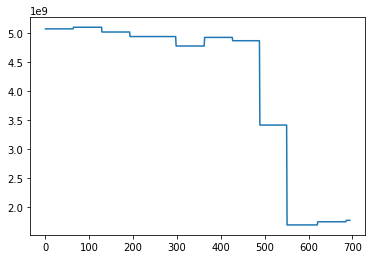

In [249]:
data.D.plot()

<AxesSubplot: >

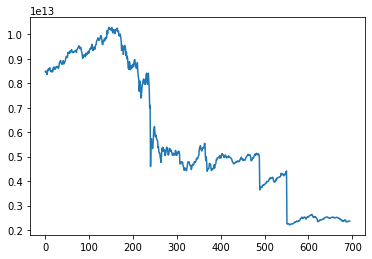

In [250]:
data.MC.plot()

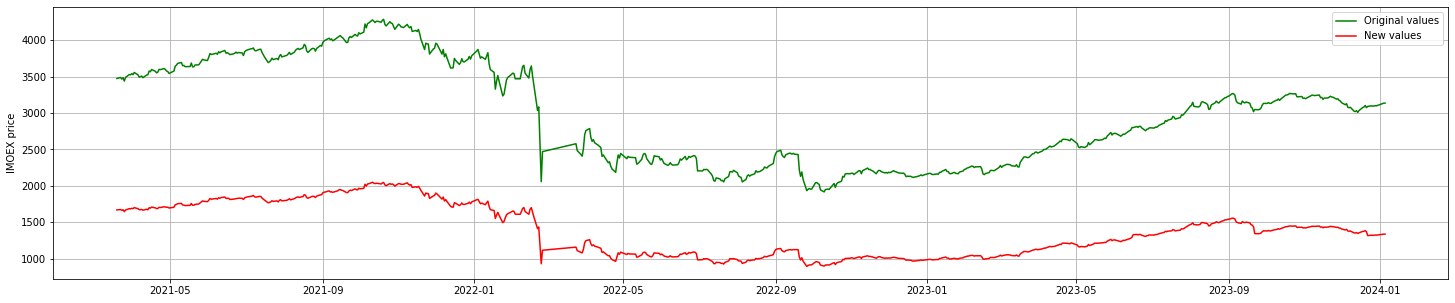

In [299]:
# plot
plt.figure(figsize=(25, 5))

plt.plot(data.Date, data.CLOSE, label = "Original values", color = "g") 
plt.plot(data.Date, data.NewClose, label = "New values", color = "r") 

plt.grid(True) 
plt.legend()
plt.ylabel("IMOEX price")

plt.show()

In [130]:
data.dtypes

Date         object
MC          float64
D           float64
NewClose    float64
CLOSE       float64
dtype: object

In [303]:
profits = pd.read_csv("index_results\profit.csv")
profits['date'] = pd.to_datetime(profits.date)
profits.set_index("date")

,Unnamed: 0,orig,new,delta
date,,,,
2021-03-19,0,0.000000,0.000000,0.000000
2021-03-22,1,0.000000,0.000000,0.000000
2021-03-23,2,0.000000,0.000000,0.000000
2021-03-24,3,0.000000,0.000000,0.000000
2021-03-25,4,0.000000,0.000000,0.000000
...,...,...,...,...
2023-12-26,2767,-0.000894,-0.001766,-0.000872
2023-12-27,2768,-0.001451,-0.001560,-0.000109
2023-12-28,2769,0.000929,0.001137,0.000207


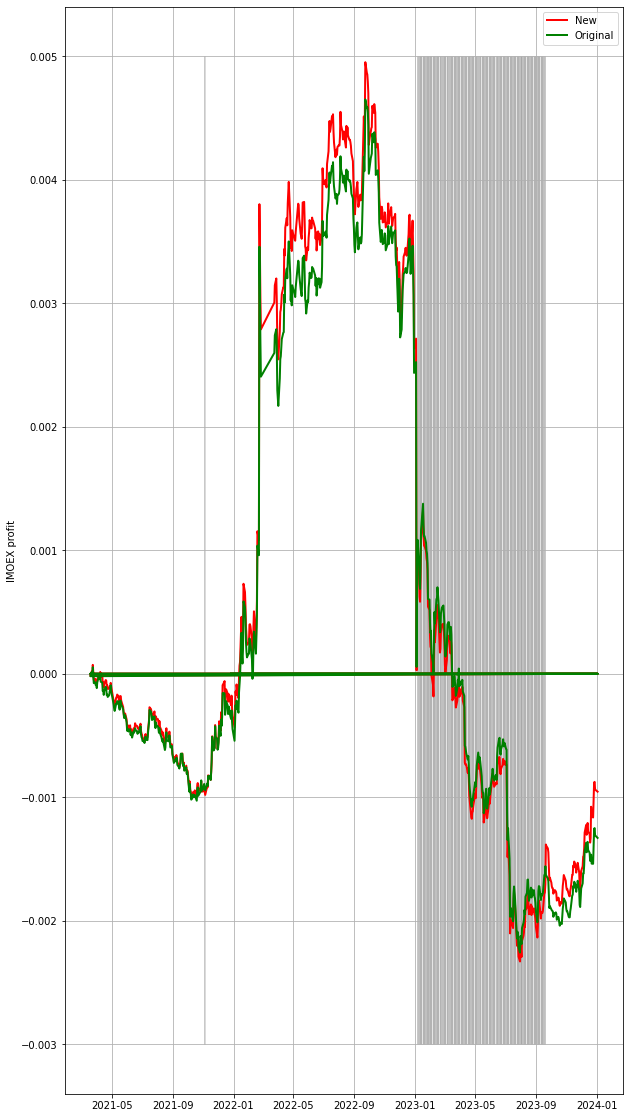

182 2771


In [318]:
window = 200 # размер окна
rolling_orig = profits.orig.rolling(window).mean()
rolling_new = profits.new.rolling(window).mean()
counter = 0
counter_all = 0
plt.figure(figsize=(10, 20))
# Построение графика
for i in range(1, len(profits.date)):
    counter_all += 1
    if rolling_new.iloc[i] + 0.00003 < rolling_orig.iloc[i]:
        counter += 1
        plt.fill_betweenx(y=[-3e-3, 5e-3], x1=profits.date.iloc[i - 1], x2=profits.date.iloc[i], color='gray', alpha=0.2)

plt.plot(profits.date, rolling_new, label="New", color="r", linewidth=2)
plt.plot(profits.date, rolling_orig, label="Original", color="g", linewidth=2)

plt.grid(True)
plt.legend()
plt.ylabel("IMOEX profit")

plt.show()
print(counter, counter_all)

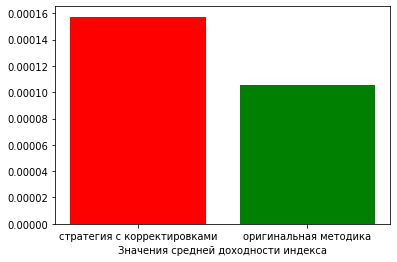

In [292]:
x = [profits.new.mean(), profits.orig.mean()]
plt.bar(range(len(x)), x, width=0.4)

plt.bar(range(len(x)), x, color=['red', 'green'])
# Создаем график
plt.bar(range(len(x)), x, width=0.4, color=['red', 'green'])
plt.xlabel("Значения средней доходности индекса")
# Задаем подписи для столбиков
plt.xticks(range(len(x)), ['стратегия с корректировками', 'оригинальная методика'])

# Отображаем график
plt.show()

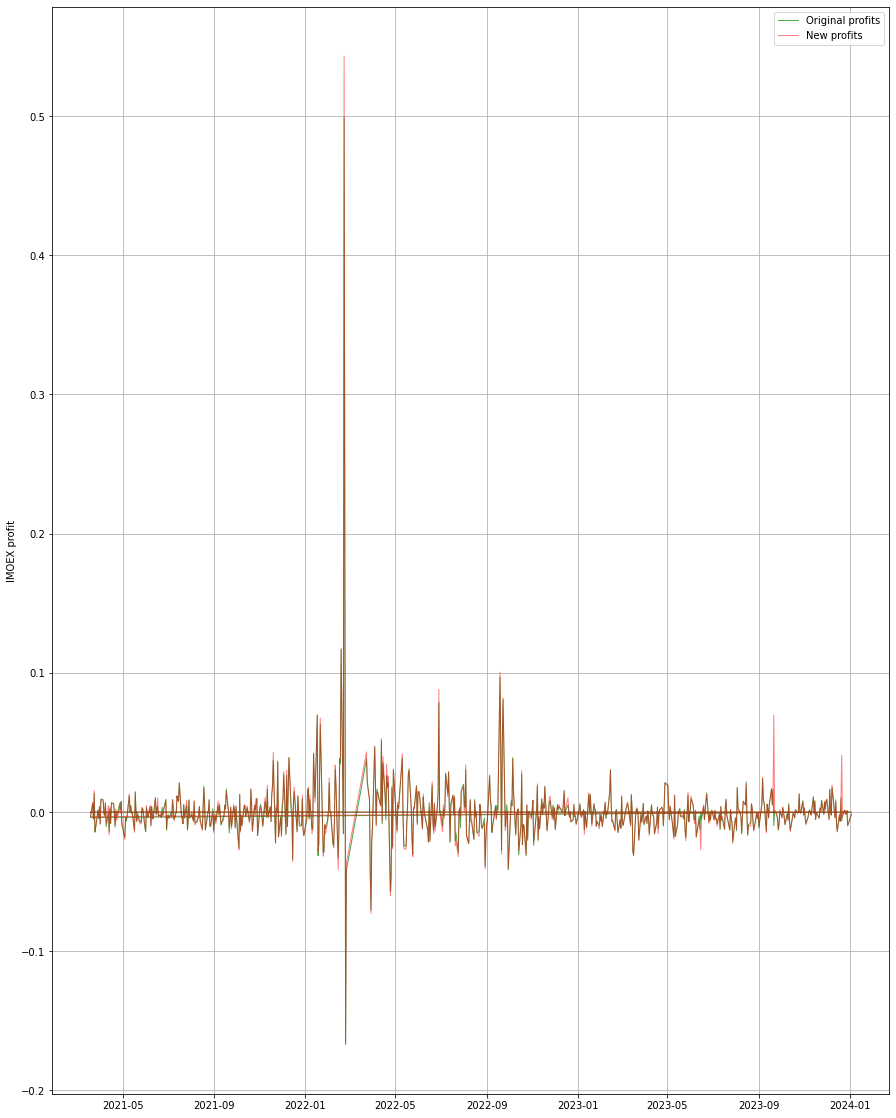

In [226]:
# plot
plt.figure(figsize=(15, 20))

plt.plot(profits.date, profits.orig, label = "Original profits", color = "g", alpha = 0.7, linewidth = 1)
plt.plot(profits.date, profits.new, label = "New profits", color = "r", alpha = 0.5, linewidth = 1)

plt.grid(True) 
plt.legend()
plt.ylabel("IMOEX profit")

plt.show()

In [167]:
profits

,perion,orig,new
0,2021-06-182021-03-19,0.094292,0.085456
1,2021-09-172021-06-18,0.061063,0.068803
2,2021-12-172021-09-17,-0.077295,-0.090722
3,2022-06-172021-12-17,-0.367765,-0.398631
4,2022-09-162022-06-17,0.034495,0.061263
5,2022-12-162022-09-16,-0.124192,-0.127267
6,2023-03-172022-12-16,0.089101,0.085485
7,2023-06-162023-03-17,0.205792,0.247948
8,2023-09-222023-06-16,0.088646,0.011491
9,2023-12-222023-09-22,0.014270,-0.020140


In [294]:
# расчет доходности по кварталам
for i in range(len(periods)):
    start = periods[i + 1] 
    end = periods[i]
    prof_orig = (data.CLOSE.loc[data.Date == start].values[0] - data.CLOSE.loc[data.Date == end].values[0]) / data.CLOSE.loc[data.Date == end].values[0]
    prof_new = (data.NewClose.loc[data.Date == start].values[0] - data.NewClose.loc[data.Date == end].values[0]) / data.NewClose.loc[data.Date == end].values[0]
    row = [str(start) + str(end), prof_orig, prof_new]
    profits.loc[len(profits.index)] = row

IndexError: index 0 is out of bounds for axis 0 with size 0


  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=d8cc45d1115a2c27817e18f35114660025afd7c391caca175b5ec4a3e2aed866
  Stored in directory: c:\users\pasin\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


NOUN
